In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [82]:
traindf = pd.read_csv("classifier_dfs/train.csv")
validatedf = pd.read_csv("classifier_dfs/validate.csv")
testdf = pd.read_csv("classifier_dfs/test.csv")

In [3]:
traindf.head(1)

,Unnamed: 0,climb_id,user_id,star_rating,tick_date,ticked,sugg_aid_grade,sugg_boulder_grade,sugg_ice_grade,sugg_mixed_grade,sugg_rock_grade,sugg_ice_grade_number,sugg_boulder_grade_number,sugg_aid_grade_number,sugg_mixed_grade_number,sugg_rock_grade_number,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,105714776_10004,105714776,10004,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
validatedf.head(1)

,user_id,climb_id,star_rating,Unnamed: 0
0,10101,105752563,2,105752563_10101


In [5]:
testdf.head(1)

,user_id,climb_id,star_rating,Unnamed: 0
0,10101,105754933,4,105754933_10101


In [83]:
traindf = traindf[["user_id","climb_id","star_rating","Unnamed: 0"]]

In [7]:
traindf.head(1)

,user_id,climb_id,star_rating,Unnamed: 0
0,10004,105714776,2,105714776_10004


In [75]:
fulldf = pd.concat([traindf, validatedf, testdf])

In [90]:
%%time

climbRatingCutOff = 45
userRatingCutOff = 45

cut_climbs = True
cut_users = True

print(len(fulldf))

while cut_climbs or cut_users:
    climbsToKeep = np.unique([climb for climb, ratings in fulldf.groupby('climb_id').count().reset_index()[['climb_id','star_rating']].values if ratings > climbRatingCutOff])
    mask = [True if climb in climbsToKeep else False for climb in list(fulldf.climb_id)]
    fulldf = fulldf[mask]
    if np.sum([0 if x else 1 for x in mask]) < 0.01 * len(mask):
        cut_climbs = False
    print(len(fulldf))
    usersToKeep = np.unique([user for user, ratings in fulldf.groupby('user_id').count().reset_index()[['user_id','star_rating']].values if ratings > climbRatingCutOff])
    mask = [True if user in usersToKeep else False for user in list(fulldf.user_id)]
    fulldf = fulldf[mask]
    if np.sum([0 if x else 1 for x in mask]) < 0.01 * len(mask):
        cut_users = False
    print(len(fulldf))

595222
297624
181888
131742
114084
99661
91913
85470
81707
78288
75763
73438
71933
70374
69409
68433
67987
67407
66872
CPU times: user 12.8 s, sys: 135 ms, total: 13 s
Wall time: 13.1 s


In [91]:
print len(np.unique(fulldf.groupby('climb_id').count().star_rating))
print len(np.unique(fulldf.groupby('user_id').count().star_rating))

136
160


In [10]:
#fulldf = pd.read_csv("classifier_dfs/finalproject-joined-cleaned-small-df.csv")

In [11]:
len(fulldf)

27543

In [92]:
rand_split = [1 if x < .7 else 2 if x < .85 else 3 for x in list(np.random.random(len(fulldf)))]
train_split = [True if x == 1 else False for x in rand_split]
validate_split = [True if x == 2 else False for x in rand_split]
test_split = [True if x == 3 else False for x in rand_split]

In [93]:
traindf = fulldf[train_split]
validatedf = fulldf[validate_split]
testdf = fulldf[test_split]

In [94]:
len(traindf), len(validatedf), len(testdf)

(46727, 10161, 9984)

In [95]:
trainUsers = np.unique(traindf.user_id)
trainClimbs = np.unique(traindf.climb_id)
validateUsers = np.unique(validatedf.user_id)
validateClimbs = np.unique(validatedf.climb_id)
testUsers = np.unique(testdf.user_id)
testClimbs = np.unique(testdf.climb_id)

In [96]:
print [user for user in validateUsers if user not in trainUsers]
print [climb for climb in validateClimbs if climb not in trainClimbs]
print [user for user in testUsers if user not in trainUsers]
print [climb for climb in testClimbs if climb not in trainClimbs]

[]
[]
[]
[]


In [97]:
print sorted(traindf.groupby('user_id').count().star_rating)[:10]
print sorted(traindf.groupby('climb_id').count().star_rating)[:10]

[25, 25, 25, 25, 26, 28, 28, 28, 29, 29]
[24, 25, 26, 27, 27, 27, 28, 28, 28, 28]


In [98]:
traindf = traindf[['climb_id', 'user_id', 'star_rating']]
validatedf = validatedf[['climb_id', 'user_id', 'star_rating']]
testdf = testdf[['climb_id', 'user_id', 'star_rating']]

In [99]:
traindf.to_csv("classifier_dfs/small-train.csv", index=False, header=True, encoding="utf-8")
validatedf.to_csv("classifier_dfs/small-validate.csv", index=False, header=True, encoding="utf-8")
testdf.to_csv("classifier_dfs/small-test.csv", index=False, header=True, encoding="utf-8")

In [100]:
climbsdf = pd.read_csv("finalproject-sorted_climbs.csv")

In [101]:
climbsdf.head(1)

,Unnamed: 0,climb_id,climb_name,climb_link,fa_year,feet,page_views,pitches,avg_stars,grade,state,latitude,longitude,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,"type_TR,",type_aid,type_alpine,type_boulder,type_ice,type_mixed,type_sport,type_trad,guide_aid_grade,guide_boulder_grade,guide_ice_grade,guide_mixed_grade,guide_rock_grade,concensus_aid_grade,concensus_boulder_grade,concensus_ice_grade,concensus_mixed_grade,concensus_rock_grade
0,105714713,105714713,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,NaN,44.0597,-103.4232,0,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8-


In [102]:
mask = [True if x in trainClimbs else False for x in climbsdf.climb_id]

In [103]:
climbsdf = climbsdf[mask]

In [104]:
climbsdf = climbsdf[["climb_id", "pitches", "type_TR,", "type_aid", "type_alpine", "type_boulder", "type_ice", "type_mixed", "type_sport", "type_trad", "concensus_aid_grade", "concensus_boulder_grade", "concensus_ice_grade", "concensus_mixed_grade", "concensus_rock_grade"]]

In [105]:
climbsdf.head(1)

,climb_id,pitches,"type_TR,",type_aid,type_alpine,type_boulder,type_ice,type_mixed,type_sport,type_trad,concensus_aid_grade,concensus_boulder_grade,concensus_ice_grade,concensus_mixed_grade,concensus_rock_grade
22,105714812,6,0,0,0,0,0,0,0,1,0,0,0,0,5.7


In [106]:
climbsdf.columns = ["climb_id", "pitches", "tr", "aid", "alpine", "boulder", "ice", "mixed", "sport", "trad", "aid_grade", "boulder_grade", "ice_grade", "mixed_grade", "rock_grade"]

In [107]:
climbsdf["aid_grade_num"] = [int(x[1]) + (0.3 if len(x) > 2 and x[2] == "+" else 0) - (0.3 if len(x) > 2 and x[2] == "-" else 0) if x != "0" else float('nan') for x in climbsdf.aid_grade ]

In [108]:
np.unique([type(x) for x in climbsdf.aid_grade_num])

array([<type 'numpy.float64'>], dtype=object)

In [109]:
climbsdf["boulder_grade_num"] = [int(x[1]) + (0.3 if len(x) > 2 and x[2] == "+" else 0) - (0.3 if len(x) > 2 and x[2] == "-" else 0) if x != "0" else float('nan') for x in climbsdf.boulder_grade ]

In [110]:
climbsdf["ice_grade_num"] = [int(x[2]) + (0.3 if len(x) > 3 and x[3] == "+" else 0) - (0.3 if len(x) > 3 and x[3] == "-" else 0) if x != "0" else float('nan') for x in climbsdf.ice_grade]

In [111]:
np.unique(list(climbsdf.mixed_grade))

array(['0'], 
      dtype='|S1')

In [112]:
climbsdf["mixed_grade_num"] = [(int(x[1:]) if len(x) > 2 and x[2] != "+" and x[2] != "-" else int(x[1]))+ (0.3 if len(x) > 2 and x[2] == "+" else 0) - (0.3 if len(x) > 2 and x[2] == "-" else 0) if x != "0" else float('nan') for x in climbsdf.mixed_grade]

In [113]:
np.unique(climbsdf.rock_grade)

array(['0', '5.10', '5.10+', '5.10-', '5.10a', '5.10a/b', '5.10b',
       '5.10b/c', '5.10c', '5.10c/d', '5.10d', '5.11', '5.11+', '5.11-',
       '5.11a', '5.11a/b', '5.11b', '5.11b/c', '5.11c', '5.11d', '5.6',
       '5.7', '5.7+', '5.8', '5.8+', '5.8-', '5.9', '5.9+', '5.9-'], dtype=object)

In [114]:
[1 for x in climbsdf.rock_grade if x == '5-6']

[]

In [115]:
climbsdf["rock_grade_num"] = [(float(x[2:x.find("+")]) + 0.3 if x.find("+") != -1 else
                               float(x[2:x.find("-")]) -0.3 if x.find("-") != -1 else
                               float(x[2:x.find("a/b")]) - 0.25 if x.find("a/b") != -1 else
                               float(x[2:x.find("b/c")]) if x.find("b/c") != -1 else
                               float(x[2:x.find("c/d")]) + 0.25 if x.find("c/d") != -1 else
                               float(x[2:x.find("a")]) - 0.375 if x.find("a") != -1 else
                               float(x[2:x.find("b")]) - 0.125 if x.find("b") != -1 else
                               float(x[2:x.find("c")]) + 0.125 if x.find("c") != -1 else
                               float(x[2:x.find("d")]) + 0.375 if x.find("d") != -1 else
                               float(x[2:]))
                              if x != '0' and x != '5-6' else float('nan') for x in climbsdf.rock_grade 
                             ]

In [116]:
climbsdf.head(1)

,climb_id,pitches,tr,aid,alpine,boulder,ice,mixed,sport,trad,aid_grade,boulder_grade,ice_grade,mixed_grade,rock_grade,aid_grade_num,boulder_grade_num,ice_grade_num,mixed_grade_num,rock_grade_num
22,105714812,6,0,0,0,0,0,0,0,1,0,0,0,0,5.7,NaN,NaN,NaN,NaN,7


In [117]:
aid_mean = np.mean(climbsdf.aid_grade_num)
aid_std = np.std(climbsdf.aid_grade_num)
boulder_mean = np.mean(climbsdf.boulder_grade_num)
boulder_std = np.std(climbsdf.boulder_grade_num)
ice_mean = np.mean(climbsdf.ice_grade_num)
ice_std = np.std(climbsdf.ice_grade_num)
mixed_mean = np.mean(climbsdf.mixed_grade_num)
mixed_std = np.std(climbsdf.mixed_grade_num)
rock_mean = np.mean(climbsdf.rock_grade_num)
rock_std = np.std(climbsdf.rock_grade_num)

In [118]:
climbsdf["aid_grade_norm"] = (climbsdf.aid_grade_num - aid_mean)/aid_std
climbsdf["boulder_grade_norm"] = (climbsdf.boulder_grade_num - boulder_mean)/boulder_std
climbsdf["ice_grade_norm"] = (climbsdf.ice_grade_num - ice_mean)/ice_std
climbsdf["mixed_grade_norm"] = (climbsdf.mixed_grade_num - mixed_mean)/mixed_std
climbsdf["rock_grade_norm"] = (climbsdf.rock_grade_num - rock_mean)/rock_std

In [119]:
climbsdf["norm_grade"] = climbsdf[["aid_grade_norm", "boulder_grade_norm", "ice_grade_norm", "mixed_grade_norm", "rock_grade_norm"]].apply(np.nanmean, axis=1)

//anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [120]:
climbsdf["norm_grade"] = [0 if np.isnan(x) else x for x in climbsdf.norm_grade ]

In [121]:
climbsdf.head(1)

,climb_id,pitches,tr,aid,alpine,boulder,ice,mixed,sport,trad,aid_grade,boulder_grade,ice_grade,mixed_grade,rock_grade,aid_grade_num,boulder_grade_num,ice_grade_num,mixed_grade_num,rock_grade_num,aid_grade_norm,boulder_grade_norm,ice_grade_norm,mixed_grade_norm,rock_grade_norm,norm_grade
22,105714812,6,0,0,0,0,0,0,0,1,0,0,0,0,5.7,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,-1.977536,-1.977536


In [122]:
climbsdf = climbsdf[["climb_id", "pitches", "tr", "aid", "alpine", "boulder", "ice", "mixed", "sport", "trad", "norm_grade"]]

In [123]:
climbsdf.head(1)

,climb_id,pitches,tr,aid,alpine,boulder,ice,mixed,sport,trad,norm_grade
22,105714812,6,0,0,0,0,0,0,0,1,-1.977536


In [124]:
pitches_mean = np.mean(climbsdf.pitches)
pitches_std = np.std(climbsdf.pitches)
climbsdf["pitches_norm"] = (climbsdf.pitches - pitches_mean)/pitches_std

In [125]:
climbsdf["pitches_norm"] = [0 if np.isnan(x) else x for x in climbsdf.pitches_norm]

In [126]:
climbsdf = climbsdf[["climb_id", "tr", "aid", "alpine", "boulder", "ice", "mixed", "sport", "trad", "norm_grade", "pitches_norm"]]

In [127]:
climbsdf.head(1)

,climb_id,tr,aid,alpine,boulder,ice,mixed,sport,trad,norm_grade,pitches_norm
22,105714812,0,0,0,0,0,0,0,1,-1.977536,1.681181


In [128]:
climbsdf = climbsdf[[x for x in list(climbsdf.columns) if x != "pitches"]]

In [129]:
climbsdict = {int(x[0]) : {'tr': x[1], 'aid': x[2], 'alpine': x[3], 'boulder': x[4], 'ice': x[5], 'mixed': x[6], 
                           'sport': x[7], 'trad': x[8], 'grade': x[9], 'pitches': x[10]} for x in climbsdf.values}

In [130]:
userlist = np.unique(list(traindf.user_id) + list(validatedf.user_id) + list(testdf.user_id))
userdict = dict(zip(userlist,range(len(userlist))))

In [131]:
climbslist = np.unique(list(traindf.climb_id) + list(validatedf.climb_id) + list(testdf.climb_id))

In [132]:
[x for x in climbslist if x not in climbsdict.keys()]

[]

In [133]:
climbsdict2 = dict(zip(climbslist,range(len(climbslist))))

In [134]:
def make_feature_matrix(indf):
    num_features = len(climbsdict.values()[0])
    featurematrix = np.zeros(shape=(len(indf), len(userdict) + len(climbsdict2) + len(climbsdict2) * num_features))
    inarray = indf[["user_id", "climb_id", "star_rating"]].values
    for i in range(len(inarray)):
        featurematrix[i, userdict[inarray[i,0]]] = 1
        featurematrix[i, len(userdict) + climbsdict2[inarray[i,1]]] = 1
        for i in range(num_features):
            featurematrix[i, (len(userdict) + len(climbsdict2) + climbsdict2[inarray[i,1]] * num_features) + i] = climbsdict[inarray[i,1]].values()[i]
    return (featurematrix, indf.star_rating.values)

In [135]:
%%time

train_fm, train_stars = make_feature_matrix(traindf)
validate_fm, validate_stars = make_feature_matrix(validatedf)
test_fm, test_stars = make_feature_matrix(testdf)

CPU times: user 2.32 s, sys: 362 ms, total: 2.68 s
Wall time: 2.79 s


In [136]:
print "Matrix Shapes:"
print 
print "train_fm", train_fm.shape
print "train_stars", train_stars.shape
print "validate_fm", validate_fm.shape
print "validate_stars", validate_stars.shape
print "test_fm", test_fm.shape
print "test_stars", test_stars.shape

Matrix Shapes:

train_fm (46727, 9901)
train_stars (46727,)
validate_fm (10161, 9901)
validate_stars (10161,)
test_fm (9984, 9901)
test_stars (9984,)


In [137]:
from sklearn.linear_model import Ridge

In [138]:
%%time

vdict={}
rdict={}
for alpha in [0.01, 0.1, 1, 10, 100, 1000]:
    regression = Ridge(alpha=alpha).fit(train_fm, train_stars)
    rdict[alpha] = regression
    predictions_actual_zip = zip(list(regression.predict(validate_fm)),list(validate_stars))
    se_sum = 0
    for (a,b) in predictions_actual_zip:
        se_sum = se_sum + (a - b)**2
    vdict[alpha] = np.sqrt(se_sum / len(predictions_actual_zip))

CPU times: user 29min 50s, sys: 27.3 s, total: 30min 17s
Wall time: 9min 18s


In [140]:
minerroralpha=min(vdict, key=vdict.get)
print minerroralpha
regr=rdict[minerroralpha] 

1


In [143]:
feature_matrix_predictions = list(regr.predict(test_fm))

In [145]:
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])

def compare_results(stars_actual, stars_predicted, ylow=1, yhigh=6, model="", predicteds=False, onsame=False, axis=False):
    """
    plot predicted results against actual results. Takes 2 arguments: a
    numpy array of actual ratings and a numpy array of predicted ratings
    scatterplots the predictions, a unit slope line, line segments joining the mean,
    and a filled in area of the standard deviations."
    """
    if onsame:
        ax=onsame
    elif axis:
        ax=axis
    else:
        fig=plt.figure()
        ax=plt.gca()
    df=pd.DataFrame(dict(actual=stars_actual, predicted=stars_predicted))
    xp=[]
    yp=[]
    for k,v in df.groupby('actual'):
        xp.append(k)
        yp.append(v.predicted.mean())        
    
    cl, = ax.plot(xp,yp, 's-', label="means for %s" % model)
    c=cl.get_color()

    sig=df.groupby('actual').predicted.std().values
    ax.fill_between(xp, yp - sig, yp + sig, 
                 color=c, alpha=0.2)
    if predicteds:
        ax.plot(df.actual, df.predicted, '.', color=c, alpha=0.1, label="predicted for %s" % model)

    if not onsame:
        ax.plot([1,5],[1,5], 'k', label="slope 1")
        ax.set_xlabel("actual")
        ax.set_ylabel("predicted")
        ax.set_ylim([ylow,yhigh])
        ax.set_xlim([0.9, 4.1])
    ax.legend(frameon=False, loc="upper left")
    rmse=get_rmse(stars_actual, stars_predicted)
    print "RMSE for %s" % model, rmse
    return ax,rmse

RMSE for Ridge Regression 0.56204531331


(<matplotlib.axes._subplots.AxesSubplot at 0x11b95ec90>, 0.56204531330964036)

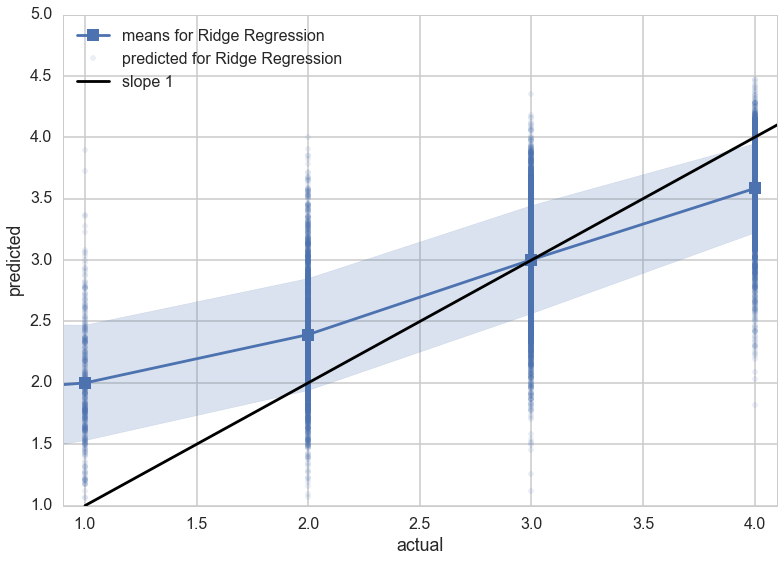

In [147]:
compare_results(test_stars, feature_matrix_predictions, model="Ridge Regression", yhigh=5, predicteds=True)